In [1]:
from astropy.table import Table
from scipy.spatial import distance_matrix
from regions import Regions
from dendrocat import RadioSource
from astropy.io import fits
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import sys
import importlib
from astropy.wcs import WCS
from scipy import interpolate
import pandas as pd
import sympy as syp
from astropy import units as u
import radio_beam
from astropy.table import Table
from radio_beam import Beam
from astropy import coordinates
from astropy import wcs
from astropy.nddata.utils import Cutout2D
from dendrocat.aperture import Ellipse, Circle
from astropy.io import ascii
from itertools import chain

#%load_ext memory_profiler
#from test import plot_flux_comp
W51 = '/orange/adamginsburg/w51/TaehwaYoo/'
W51b6 = '/orange/adamginsburg/w51/TaehwaYoo/2015.1.01596.S_W51_B6_LB/continuum_images/'
W51cont='/orange/adamginsburg/w51/TaehwaYoo/b6contfits/'

#---------- high res B6 (before conv) ------------
w51e2_b6_briggs=W51cont+'W51e2_cont_bigbriggs.image.fits'
w51e2_b6_robust0=W51cont+'W51e2_cont_big_robust0.image.fits'
w51e2_b6_uniform=W51cont+'W51e2_cont_biguniform.image.fits'
w51e2_b6_superuniform=W51cont+'W51e2_cont_bigsuperuniform.image.fits'

w51n_b6_briggs = W51cont+'W51n_cont_bigbriggs.image.fits'
w51n_b6_robust0 = W51cont+'w51n_cont_big_robust0.image.fits'
w51n_b6_uniform = W51cont+'W51n_cont_biguniform.image.fits'
w51n_b6_superuniform = W51cont+'W51n_cont_bigsuperuniform.image.fits'
w51n_b6_natural = W51cont+'W51n_cont_bignatural.image.fits'

#---------- high res B3 (before conv) ------------

W51b3 = '/orange/adamginsburg/w51/TaehwaYoo/2017.1.00293.S_W51_B3_LB/may2021_successful_imaging/'

w51n_b3_tt0 = W51b3+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b3_tt1 = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51n_b3_alpha = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51conv = '/orange/adamginsburg/w51/TaehwaYoo/convolved_new/'
w51n_b6_conv = w51conv + 'w51n_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b3_tt0 = W51b3+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51e2_b3_tt1 = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51e2_b3_alpha = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51e2_b6_conv = w51conv + 'w51e2_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b6_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B6_conv.fits'
w51e_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B3_conv.fits'


w51n_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_B3_conv.fits'

w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'

w51n_b6_conv_briggs = w51conv + 'w51n_briggs_B6_conv.fits'
w51n_b6_conv_robust0 = w51conv + 'w51n_robust0_B6_conv.fits'
w51n_b6_conv_superuniform = w51conv + 'w51n_superuniform_B6_conv.fits'


w51e_b6_conv_briggs = w51conv + 'w51e_briggs_B6_conv.fits'


#catalogdir = '/Users/dbahck37/w51data/alma_imf/catalog/getsf-native/'
catalogdir = '/orange/adamginsburg/ALMA_IMF/catalogs/getsf-smoothed/'
cat_w51e = catalogdir + 'W51-E-getsf.cat'
cat_w51n = catalogdir + 'W51-IRS2-getsf.cat'


w51n_b3_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_selfcal4_finaliter.image.tt0.pbcor.fits'
w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'
w51e_b3_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'
w51e_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'

w51n_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_B3_conv.fits'
w51n_b6_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_B6_conv.fits'
w51e_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B3_conv.fits'
w51e_b6_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B6_conv.fits'


w51e_b3_almaimf_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_b3_rms.reg'
w51e_b6_almaimf_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_b3_rms.reg'

w51n_b3_almaimf_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_b3_rms.reg'
w51n_b6_almaimf_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_b3_rms.reg'


w51e_b3_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51e_b3_std_sky.reg'
w51e_b6_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51e_b6_std_sky.reg'
w51n_b3_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51n_b3_std_sky.reg'
w51n_b6_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51n_b6_std_sky.reg'

#---------- local direc  ------------

"""

w51n_b3_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_selfcal4_finaliter.image.tt0.pbcor.fits'
w51n_b6_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'



w51e_b3_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-E_B3_uid___A001"X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'
w51e_b6_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'


w51n_b6_conv_briggs = '/Users/dbahck37/w51data/convolved_new/w51n_briggs_B6_conv.fits'
w51n_b3_tt0 = '/Users/dbahck37/w51data/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'

w51e_b3_tt0 = '/Users/dbahck37/W51data/w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'

w51e_b6_conv_briggs ='/Users/dbahck37/W51data/convolved_new/w51e_briggs_B6_conv.fits'
"""
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['axes.titlesize']=20


def deg2HMS(ra=-9999,dec=-9999):
    RA, DEC, rs, ds = '', '', '', ''

    if ra:
        if ra<0:
            rs, ra = '-', abs(ra)
        raH = int(ra/15)
        raM = int(((ra/15)-raH)*60)
        raS = ((((ra/15)-raH)*60)-raM)*60
    
   
 
        RA = '{0}{1} {2} {3}'.format(rs, raH, raM, raS)
    
    if dec:
        if dec<0:
            ds, dec = '-', abs(dec)
        deg = int(dec)
        decM = abs(int((dec-deg)*60))
        decS = (abs((dec-deg)*60)-decM)*60
        DEC = '{0}{1} {2} {3}'.format(ds, deg, decM, decS)

    if ra and dec:
        return (RA, DEC)
    else:
        return RA or DEC








In [2]:
def get_flux(image,peakxy, beam1, wcsNB, pixel_scale, major,minor,pa,issky=False,savedir=None, aperture='beam'):
    """
    image : image file from fits
    peakxy = np.vstack((xpos,ypos)).T either pixel or sky coords
    beam1 : beam from header
    wcsNB : wcs from header
    pixel_scale : pixel_scale from header
    major : major axis in deg
    minor : minor axis in deg
    pa : postion angle in deg
    aperture : 'beam' or 'circle'
    """
    beamarea = beam1.sr.value   
    if issky:
        cen_world = peakxy
    else:
        cen_world = wcsNB.wcs_pix2world(peakxy,0)
    num_source = len(cen_world)

    positions = coordinates.SkyCoord(cen_world[0],cen_world[1], frame=wcs.utils.wcs_to_celestial_frame(wcsNB).name,unit=(u.deg,u.deg))
    cutout = Cutout2D(image, positions, 4.0*major, wcs=wcsNB, mode='partial')
    frame = wcs.utils.wcs_to_celestial_frame(cutout.wcs).name
    
    if aperture=='beam':
        aper = Ellipse(positions, major, minor, -1*pa, unit=u.deg, frame=frame) # pa in degree with anti-clockwise direction

    elif aperture=='circle':
        aper = Circle(positions, major, frame=frame, unit=u.deg)
    this_mask = aper.place(cutout.data, wcs=cutout.wcs)
    pixel_scale_sr = (pixel_scale.value * np.pi/180)**2 # pixel scale in deg^2 -> sr
    flux =np.sum(cutout.data[this_mask]/beamarea*pixel_scale_sr) # Jy/beam / (sr/beam) * (sr/pixel) = Jy/ pixel
    
    if savedir is not None:
        if not os.path.isdir(savedir):
            os.mkdir(savedir)
        else:
            fig = plt.figure(figsize=(10,10))
            ax1=fig.add_axes([0.2,0.2,0.8,0.8],projection=wcsNB)
            ax1.imshow(cutout.data, origin='lower')
            ax1.imshow(this_mask, origin='lower',alpha=0.1,cmap='gray')
            plt.savefig(savedir+'aper_%04d.png'%i)
            plt.close()
            
    return flux

def get_flux_aperture(table, datapath, apertures, band='B6'):
    """
    table : catalog table
    imagedata : a path to datafile
    apertures : aperture arrays in au
    band : 'B6' or 'B3'
    """
    x_sky = table['x_sky']
    y_sky = table['y_sky']
    
    numsource = len(x_sky)
    
    fitsdata = fits.open(datapath)
    hdr = fits.getheader(datapath)
    wcsHR = WCS(hdr,naxis=2)
    scale = wcsHR.proj_plane_pixel_scales()[0]
    image = fitsdata[0].data[0][0]
    beamHR = Beam.from_fits_header(hdr)
    
    flux = np.zeros((numsource, len(apertures)))
    for i in range(numsource):
        peakxy = [x_sky[i],y_sky[i]]
        for j, aper in enumerate(apertures):
            
            flux[i,j] = get_flux(image, peakxy, beamHR, wcsHR, scale, aper*u.deg,aper*u.deg, 0, issky=True, aperture='circle') 
            
    return flux
                    
w51e_table = Table.read('/home/t.yoo/w51/catalogue/spectral_index/w51e_combined_catalog.fits')
w51n_table = Table.read('/home/t.yoo/w51/catalogue/spectral_index/w51n_combined_catalog.fits')
w51e_x_sky = w51e_table['x_sky']
w51e_y_sky = w51e_table['y_sky']
w51n_x_sky = w51n_table['x_sky']
w51n_y_sky = w51n_table['y_sky']

apertures_in_au = np.logspace(2,6,20)
apertures_in_au_selected = np.array([apertures_in_au[3], apertures_in_au[4], apertures_in_au[5], apertures_in_au[6]]) 
apertures_in_deg_w51e = apertures_in_au_selected / (5.41e3*206265.) * 180 / np.pi
apertures_in_deg_w51n = apertures_in_au_selected / (5.1e3*206265.) * 180 / np.pi


w51e_b3_flux = get_flux_aperture(w51e_table, w51e_b3_tt0, apertures_in_deg_w51e, band='B3')
w51e_b6_flux = get_flux_aperture(w51e_table, w51e2_b6_briggs, apertures_in_deg_w51e, band='B6')
w51n_b3_flux = get_flux_aperture(w51n_table, w51n_b3_tt0, apertures_in_deg_w51n, band='B3')
w51n_b6_flux = get_flux_aperture(w51n_table, w51n_b6_briggs, apertures_in_deg_w51n, band='B6')

print(w51e_b3_flux)


[[2.92501325e-04 4.97871079e-04 6.65829575e-04 9.20814928e-04]
 [1.02434971e-03 1.73703232e-03 2.45462265e-03 3.34046362e-03]
 [1.82122993e-03 2.85392068e-03 3.54927871e-03 4.27955482e-03]
 [1.35110132e-03 2.51570647e-03 3.98673816e-03 6.54000929e-03]
 [1.28749362e-03 2.34499807e-03 3.67393345e-03 5.98261319e-03]
 [6.47230132e-04 1.28364423e-03 2.67824624e-03 5.80800790e-03]
 [7.60074705e-04 1.60031475e-03 3.13832238e-03 6.31248206e-03]
 [2.70049757e-04 5.79813030e-04 1.26742269e-03 2.45687179e-03]
 [4.53542307e-04 7.41010008e-04 1.03570882e-03 1.49415538e-03]
 [6.65217172e-04 1.39661017e-03 2.60230061e-03 4.94409818e-03]
 [3.53981450e-04 7.62127107e-04 1.41275651e-03 2.56795296e-03]
 [2.42582857e-04 4.52293782e-04 7.97354151e-04 1.51542737e-03]
 [7.95991335e-04 1.58392778e-03 2.95534404e-03 5.70252538e-03]
 [1.06826553e-03 2.31468165e-03 4.54656966e-03 9.30514839e-03]
 [2.23219817e-04 4.47587867e-04 8.35749554e-04 1.50821230e-03]
 [3.27278883e-03 5.96752344e-03 9.12276097e-03 1.403794

In [3]:
def get_min_distances_between_sources(xysources):
    from scipy.spatial import distance_matrix
    
    dist_mat = distance_matrix(xysources,xysources)
    num = dist_mat.shape[0]
    mins = []
    for i in range(num):
        arr = dist_mat[i,:]
        min_dist = np.min(arr[arr>0])
        mins.append(min_dist)
    return np.array(mins)

w51e_xysky = np.vstack((w51e_x_sky,w51e_y_sky)).T

w51e_dist = get_min_distances_between_sources(w51e_xysky)    
w51e_dist_au = w51e_dist * np.pi / 180 * 5.41e3 * 206265.

w51n_xysky = np.vstack((w51n_x_sky,w51n_y_sky)).T

w51n_dist = get_min_distances_between_sources(w51n_xysky)    
w51n_dist_au = w51n_dist * np.pi / 180 * 5.41e3 * 206265.

print(np.min(w51e_dist_au), np.min(w51n_dist_au))
for i in range(w51e_b3_flux.shape[0]):
    b3ind = np.searchsorted(apertures_in_au_selected, w51e_dist_au[i])
    b6ind = np.searchsorted(apertures_in_au_selected, w51e_dist_au[i])
    w51e_b3_flux[i,b3ind+1:]=-1
    w51e_b6_flux[i,b6ind+1:]=-1
    
    print(w51e_dist_au[i], w51e_b3_flux[i,:],w51e_b6_flux[i,:]/w51e_b3_flux[i,:])
    
for i in range(w51n_b3_flux.shape[0]):
    b3ind = np.searchsorted(apertures_in_au_selected, w51n_dist_au[i])
    b6ind = np.searchsorted(apertures_in_au_selected, w51n_dist_au[i])
    w51n_b3_flux[i,b3ind+1:]=-1
    w51n_b6_flux[i,b6ind+1:]=-1


    
def measure_rms(data, noiseregiondir):
    fitsdata = fits.open(data)
    noiseregion= Regions.read(noiseregiondir,format='ds9')
    image = fitsdata[0].data
    wcs = WCS(fitsdata[0].header,naxis=2)

    container = []
    for reg in noiseregion:
        pix_reg = reg.to_pixel(wcs)
        noisemask = pix_reg.to_mask()
        noiseim = noisemask.cutout(image)
        container.append(noiseim.flatten())
    noiseim = list(chain.from_iterable(container))
    std = stats.mad_std(noiseim,ignore_nan=True)
    return std   

360.4678812396529 605.9205693086294
1361.9576025192844 [0.0002925  0.00049787 0.00066583 0.00092081] [ 5.71396606  5.56224408  3.79124922 -3.38481695]
5581.623858941343 [0.00102435 0.00173703 0.00245462 0.00334046] [ 6.91614242  6.95592908  8.26210042 10.98354673]
1446.2119366878226 [0.00182123 0.00285392 0.00354928 0.00427955] [5.09750511 5.33884637 6.45127839 8.93322832]
1061.208373217476 [ 0.0013511   0.00251571  0.00398674 -1.        ] [4.02219738 3.95688947 3.75602348 1.        ]
1061.208373217476 [ 0.00128749  0.002345    0.00367393 -1.        ] [4.7902964  4.88502684 5.53309931 1.        ]
669.2903740469965 [ 6.47230132e-04  1.28364423e-03 -1.00000000e+00 -1.00000000e+00] [5.38257192 4.73807056 1.         1.        ]
708.1199537156833 [ 7.60074705e-04  1.60031475e-03  3.13832238e-03 -1.00000000e+00] [5.30727867 5.19287716 4.79817423 1.        ]
544.4535224398674 [ 2.70049757e-04  5.79813030e-04 -1.00000000e+00 -1.00000000e+00] [8.83235758 7.44174586 1.         1.        ]
5676.5

s-pbsmi
s-p-hmi
spu-hmi
spubsmi
s-pbhmi
s-u-smi
s-ubhmi
spu-smi
s-u-hmi
s-ubsmi
spubhmi
s-p-smi


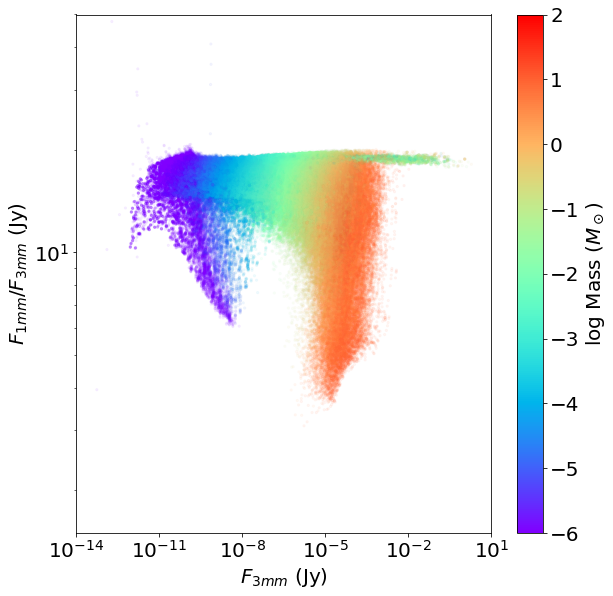

In [4]:
import glob
import os
b3freq = 92982346121.91989
b6freq = 226382496476.07114
    
apertures =np.logspace(2,6,20)
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')

cmap=plt.get_cmap('rainbow')

pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')

geometry = [os.path.basename(path).split('/')[-1][:7] for path in pathlist]

B3err = measure_rms
seddir = '/orange/adamginsburg/w51/TaehwaYoo/SEDmodel/'
for path in geometry:
    filepath = seddir+path+'/flux_prop.fits'
    if not os.path.isfile(filepath):
        continue
    fluxfile = fits.open(filepath)
    cols = fluxfile[1].columns
    if not 'mass_los' in cols.names:
        continue
    print(path)
    

    b6flux = fluxfile[1].data['b6 flux'][:,3]*1e-3*(1/5.41)**2
    b3flux = fluxfile[1].data['b3 flux'][:,3]*1e-3*(1/5.41)**2
    dusttemp = fluxfile[1].data['mass_los'][:,3]
    notemp = dusttemp>-99
    dusttemp = dusttemp[notemp]
    logtemp = np.log10(dusttemp)

    b3flux = b3flux[notemp] ; b6flux = b6flux[notemp]
    ss = ax1.scatter(b3flux, b6flux/b3flux,s=5,alpha=0.05, c=logtemp, cmap=cmap, vmin=-6, vmax=2)

           
            

            #ss = axes[i,j].scatter(b3flux, b6flux/b3flux,s=5,alpha=0.05, c=np.repeat(logtemp,multiple), cmap=cmap, vmin=-2, vmax=1)

"""
for i in range(2):
    for j in range(2):    
        ind = i*2+j
        axes[i,j].scatter(w51n_b3_flux[:,ind]*(5.41/5.1)**2, w51n_b6_flux[:,ind]/w51n_b3_flux[:,ind], marker='^',label='W51n')
    
        axes[i,j].scatter(w51e_b3_flux[:,ind], w51e_b6_flux[:,ind]/w51e_b3_flux[:,ind], marker='o',label='W51e',c='cyan')
        print(w51n_b3_flux[:,ind], w51n_b6_flux[:,ind]/w51n_b3_flux[:,ind])
        xx = np.logspace(-9,4,100)

        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**4, label=r'$\alpha=4$', ls='dashed')
        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**3, label=r'$\alpha=3$', ls='dashed')
        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**2, label=r'$\alpha=2$', ls='dashed')
        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq), label=r'$\alpha=1$', ls='dashed')
        axes[i,j].legend(loc='lower left')
        #axes[i,j].set_xlim(1e-9,1e4)
        #axes[i,j].set_ylim(3,30)
        #axes[i,j].set_xscale('log')
        #axes[i,j].set_yscale('log')
        axes[i,j].set_title('aperture = %3.2f au'%apertures[ind+3])
        
        axes[i,j].set_xscale('log')
        axes[i,j].set_yscale('log')
        axes[i,j].set_xlabel('$F_{3mm}$ (Jy)')
        axes[i,j].set_ylabel('$F_{1mm}/F_{3mm}$ (Jy)')
        axes[i,j].set_xlim(1e-6,1e-1)
        axes[i,j].set_ylim(1.5,50)
"""
color_bar = plt.colorbar(ss, ax=ax1,alpha=1)


color_bar.set_alpha(1)
color_bar.draw_all()
color_bar.set_label('log Mass ($M_\odot$)')
ax1.set_xlim(1e-14,1e1)
ax1.set_ylim(1.5,50)
ax1.set_xlabel('$F_{3mm}$ (Jy)')
ax1.set_ylabel('$F_{1mm}/F_{3mm}$ (Jy)')
ax1.set_xscale('log')
ax1.set_yscale('log')
plt.savefig('mass_los_plot_obs.png')

s-pbsmi
s-p-hmi
spu-hmi
spubsmi
s-pbhmi
s-u-smi
s-ubhmi
spu-smi
s-u-hmi
s-ubsmi
spubhmi
s-p-smi
[0.00054562 0.00111047 0.00163574 0.05436417 0.00269352 0.00152431
 0.00103444 0.00744917 0.00261887 0.01557867 0.00319342 0.00067924
 0.00107249 0.00068396 0.00204441 0.00392831 0.00092348 0.00259834
 0.00232616 0.00306794 0.00219378 0.00268513]


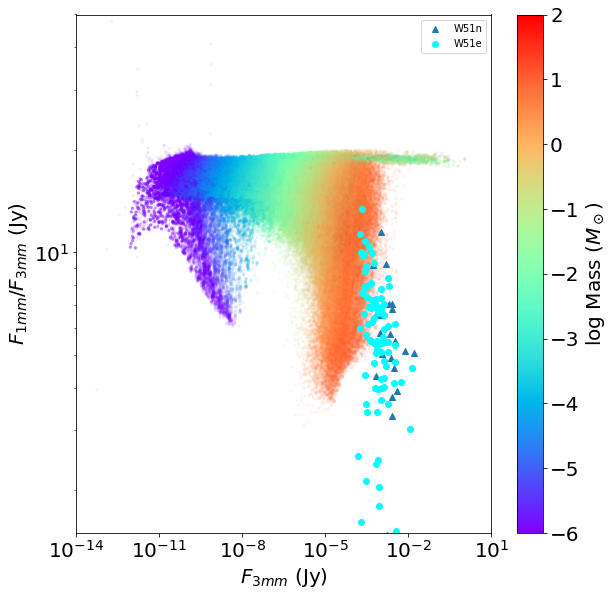

In [5]:
import glob
import os
b3freq = 92982346121.91989
b6freq = 226382496476.07114
    
apertures =np.logspace(2,6,20)
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')

cmap=plt.get_cmap('rainbow')

pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')

geometry = [os.path.basename(path).split('/')[-1][:7] for path in pathlist]

B3err = measure_rms

for path in geometry:
    filepath = seddir+path+'/flux_prop.fits'
    if not os.path.isfile(filepath):
        continue
    fluxfile = fits.open(filepath)
    cols = fluxfile[1].columns
    if not 'mass_los' in cols.names:
        continue
    print(path)
    

    b6flux = fluxfile[1].data['b6 flux'][:,3]*1e-3*(1/5.41)**2
    b3flux = fluxfile[1].data['b3 flux'][:,3]*1e-3*(1/5.41)**2
    dusttemp = fluxfile[1].data['mass_los'][:,3]
    notemp = dusttemp>-99
    dusttemp = dusttemp[notemp]
    logtemp = np.log10(dusttemp)

    b3flux = b3flux[notemp] ; b6flux = b6flux[notemp]
    ss = ax1.scatter(b3flux, b6flux/b3flux,s=5,alpha=0.05, c=logtemp, cmap=cmap, vmin=-6, vmax=2)
ax1.scatter(w51n_b3_flux[:,0]*(5.41/5.1)**2, w51n_b6_flux[:,0]/w51n_b3_flux[:,0], marker='^',label='W51n')
print(w51n_b3_flux[:,0]*(5.41/5.1)**2)
ax1.scatter(w51e_b3_flux[:,0], w51e_b6_flux[:,0]/w51e_b3_flux[:,0], marker='o',label='W51e',c='cyan')
           
            

            #ss = axes[i,j].scatter(b3flux, b6flux/b3flux,s=5,alpha=0.05, c=np.repeat(logtemp,multiple), cmap=cmap, vmin=-2, vmax=1)

"""
for i in range(2):
    for j in range(2):    
        ind = i*2+j
        axes[i,j].scatter(w51n_b3_flux[:,ind]*(5.41/5.1)**2, w51n_b6_flux[:,ind]/w51n_b3_flux[:,ind], marker='^',label='W51n')
    
        axes[i,j].scatter(w51e_b3_flux[:,ind], w51e_b6_flux[:,ind]/w51e_b3_flux[:,ind], marker='o',label='W51e',c='cyan')
        print(w51n_b3_flux[:,ind], w51n_b6_flux[:,ind]/w51n_b3_flux[:,ind])
        xx = np.logspace(-9,4,100)

        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**4, label=r'$\alpha=4$', ls='dashed')
        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**3, label=r'$\alpha=3$', ls='dashed')
        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**2, label=r'$\alpha=2$', ls='dashed')
        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq), label=r'$\alpha=1$', ls='dashed')
        axes[i,j].legend(loc='lower left')
        #axes[i,j].set_xlim(1e-9,1e4)
        #axes[i,j].set_ylim(3,30)
        #axes[i,j].set_xscale('log')
        #axes[i,j].set_yscale('log')
        axes[i,j].set_title('aperture = %3.2f au'%apertures[ind+3])
        
        axes[i,j].set_xscale('log')
        axes[i,j].set_yscale('log')
        axes[i,j].set_xlabel('$F_{3mm}$ (Jy)')
        axes[i,j].set_ylabel('$F_{1mm}/F_{3mm}$ (Jy)')
        axes[i,j].set_xlim(1e-6,1e-1)
        axes[i,j].set_ylim(1.5,50)
"""
color_bar = plt.colorbar(ss, ax=ax1,alpha=1)


color_bar.set_alpha(1)
color_bar.draw_all()
color_bar.set_label('log Mass ($M_\odot$)')
plt.legend()
ax1.set_xlim(1e-14,1e1)
ax1.set_ylim(1.5,50)
ax1.set_xlabel('$F_{3mm}$ (Jy)')
ax1.set_ylabel('$F_{1mm}/F_{3mm}$ (Jy)')
ax1.set_xscale('log')
ax1.set_yscale('log')
plt.savefig('mass_los_plot_obs.png')

s-pbsmi
s-p-hmi
spu-hmi
spubsmi
s-pbhmi
s-u-smi
s-ubhmi
spu-smi
s-u-hmi
s-ubsmi
spubhmi
s-p-smi


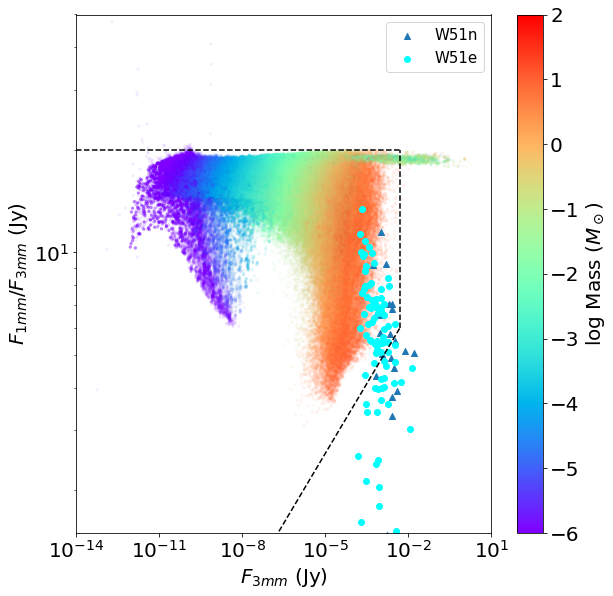

In [6]:
import glob
import os
b3freq = 92982346121.91989
b6freq = 226382496476.07114
    
apertures =np.logspace(2,6,20)
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')

cmap=plt.get_cmap('rainbow')

pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')

geometry = [os.path.basename(path).split('/')[-1][:7] for path in pathlist]

B3err = measure_rms

for path in geometry:
    filepath = seddir+path+'/flux_prop.fits'
    if not os.path.isfile(filepath):
        continue
    fluxfile = fits.open(filepath)
    cols = fluxfile[1].columns
    if not 'mass_los' in cols.names:
        continue
    print(path)
    

    b6flux = fluxfile[1].data['b6 flux'][:,3]*1e-3*(1/5.41)**2
    b3flux = fluxfile[1].data['b3 flux'][:,3]*1e-3*(1/5.41)**2
    dusttemp = fluxfile[1].data['mass_los'][:,3]
    notemp = dusttemp>-99
    dusttemp = dusttemp[notemp]
    logtemp = np.log10(dusttemp)

    b3flux = b3flux[notemp] ; b6flux = b6flux[notemp]
    ss = ax1.scatter(b3flux, b6flux/b3flux,s=5,alpha=0.05, c=logtemp, cmap=cmap, vmin=-6, vmax=2)
ax1.scatter(w51n_b3_flux[:,0]*(5.41/5.1)**2, w51n_b6_flux[:,0]/w51n_b3_flux[:,0], marker='^',label='W51n')

ax1.scatter(w51e_b3_flux[:,0], w51e_b6_flux[:,0]/w51e_b3_flux[:,0], marker='o',label='W51e',c='cyan')
           
ax1.plot([5e-3,5e-3],[6,20],c='k',ls='dashed')            
ax1.plot([1e-8,5e-3],[1,6],c='k',ls='dashed')            
ax1.plot([1e-14,5e-3],[20,20],c='k',ls='dashed')
            #ss = axes[i,j].scatter(b3flux, b6flux/b3flux,s=5,alpha=0.05, c=np.repeat(logtemp,multiple), cmap=cmap, vmin=-2, vmax=1)

"""
for i in range(2):
    for j in range(2):    
        ind = i*2+j
        axes[i,j].scatter(w51n_b3_flux[:,ind]*(5.41/5.1)**2, w51n_b6_flux[:,ind]/w51n_b3_flux[:,ind], marker='^',label='W51n')
    
        axes[i,j].scatter(w51e_b3_flux[:,ind], w51e_b6_flux[:,ind]/w51e_b3_flux[:,ind], marker='o',label='W51e',c='cyan')
        print(w51n_b3_flux[:,ind], w51n_b6_flux[:,ind]/w51n_b3_flux[:,ind])
        xx = np.logspace(-9,4,100)

        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**4, label=r'$\alpha=4$', ls='dashed')
        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**3, label=r'$\alpha=3$', ls='dashed')
        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**2, label=r'$\alpha=2$', ls='dashed')
        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq), label=r'$\alpha=1$', ls='dashed')
        axes[i,j].legend(loc='lower left')
        #axes[i,j].set_xlim(1e-9,1e4)
        #axes[i,j].set_ylim(3,30)
        #axes[i,j].set_xscale('log')
        #axes[i,j].set_yscale('log')
        axes[i,j].set_title('aperture = %3.2f au'%apertures[ind+3])
        
        axes[i,j].set_xscale('log')
        axes[i,j].set_yscale('log')
        axes[i,j].set_xlabel('$F_{3mm}$ (Jy)')
        axes[i,j].set_ylabel('$F_{1mm}/F_{3mm}$ (Jy)')
        axes[i,j].set_xlim(1e-6,1e-1)
        axes[i,j].set_ylim(1.5,50)
"""
color_bar = plt.colorbar(ss, ax=ax1,alpha=1)


color_bar.set_alpha(1)
color_bar.draw_all()
color_bar.set_label('log Mass ($M_\odot$)')
plt.legend(fontsize=15)
ax1.set_xlim(1e-14,1e1)
ax1.set_ylim(1.5,50)
ax1.set_xlabel('$F_{3mm}$ (Jy)')
ax1.set_ylabel('$F_{1mm}/F_{3mm}$ (Jy)')
ax1.set_xscale('log')
ax1.set_yscale('log')
plt.savefig('mass_los_plot_obs_boundary.png')





s-pbsmi
s-p-hmi
spu-hmi
spubsmi
s-pbhmi
s-u-smi
s-ubhmi
spu-smi
s-u-hmi
s-ubsmi
spubhmi
s-p-smi


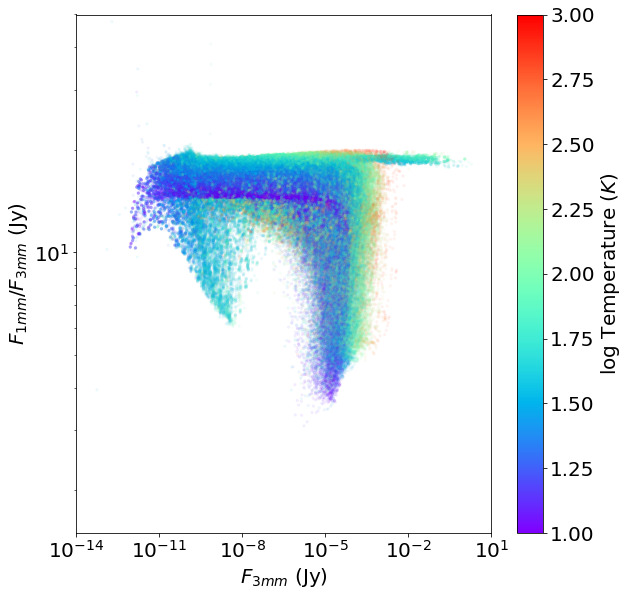

In [7]:
import glob
import os
b3freq = 92982346121.91989
b6freq = 226382496476.07114
    
apertures =np.logspace(2,6,20)
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')

cmap=plt.get_cmap('rainbow')

pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')

geometry = [os.path.basename(path).split('/')[-1][:7] for path in pathlist]

B3err = measure_rms

for path in geometry:
    filepath = seddir+path+'/flux_prop.fits'
    if not os.path.isfile(filepath):
        continue
    fluxfile = fits.open(filepath)
    cols = fluxfile[1].columns
    if not 'mass_los' in cols.names:
        continue
    print(path)
    

    b6flux = fluxfile[1].data['b6 flux'][:,3]*1e-3*(1/5.41)**2
    b3flux = fluxfile[1].data['b3 flux'][:,3]*1e-3*(1/5.41)**2
    dusttemp = fluxfile[1].data['temp_los'][:,3]
    notemp = dusttemp>-99
    dusttemp = dusttemp[notemp]
    logtemp = np.log10(dusttemp)

    b3flux = b3flux[notemp] ; b6flux = b6flux[notemp]
    ss = ax1.scatter(b3flux, b6flux/b3flux,s=5,alpha=0.05, c=logtemp, cmap=cmap, vmin=1, vmax=3)

           
            

            #ss = axes[i,j].scatter(b3flux, b6flux/b3flux,s=5,alpha=0.05, c=np.repeat(logtemp,multiple), cmap=cmap, vmin=-2, vmax=1)

"""
for i in range(2):
    for j in range(2):    
        ind = i*2+j
        axes[i,j].scatter(w51n_b3_flux[:,ind]*(5.41/5.1)**2, w51n_b6_flux[:,ind]/w51n_b3_flux[:,ind], marker='^',label='W51n')
    
        axes[i,j].scatter(w51e_b3_flux[:,ind], w51e_b6_flux[:,ind]/w51e_b3_flux[:,ind], marker='o',label='W51e',c='cyan')
        print(w51n_b3_flux[:,ind], w51n_b6_flux[:,ind]/w51n_b3_flux[:,ind])
        xx = np.logspace(-9,4,100)

        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**4, label=r'$\alpha=4$', ls='dashed')
        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**3, label=r'$\alpha=3$', ls='dashed')
        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**2, label=r'$\alpha=2$', ls='dashed')
        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq), label=r'$\alpha=1$', ls='dashed')
        axes[i,j].legend(loc='lower left')
        #axes[i,j].set_xlim(1e-9,1e4)
        #axes[i,j].set_ylim(3,30)
        #axes[i,j].set_xscale('log')
        #axes[i,j].set_yscale('log')
        axes[i,j].set_title('aperture = %3.2f au'%apertures[ind+3])
        
        axes[i,j].set_xscale('log')
        axes[i,j].set_yscale('log')
        axes[i,j].set_xlabel('$F_{3mm}$ (Jy)')
        axes[i,j].set_ylabel('$F_{1mm}/F_{3mm}$ (Jy)')
        axes[i,j].set_xlim(1e-6,1e-1)
        axes[i,j].set_ylim(1.5,50)
"""
color_bar = plt.colorbar(ss, ax=ax1,alpha=1)


color_bar.set_alpha(1)
color_bar.draw_all()
color_bar.set_label('log Temperature ($K$)')
ax1.set_xlim(1e-14,1e1)
ax1.set_ylim(1.5,50)
ax1.set_xlabel('$F_{3mm}$ (Jy)')
ax1.set_ylabel('$F_{1mm}/F_{3mm}$ (Jy)')
ax1.set_xscale('log')
ax1.set_yscale('log')
plt.savefig('mass_los_plot_obs.png')

s-pbsmi
s-p-hmi
spu-hmi
spubsmi
s-pbhmi
s-u-smi
s-ubhmi
spu-smi
s-u-hmi
s-ubsmi
spubhmi
s-p-smi


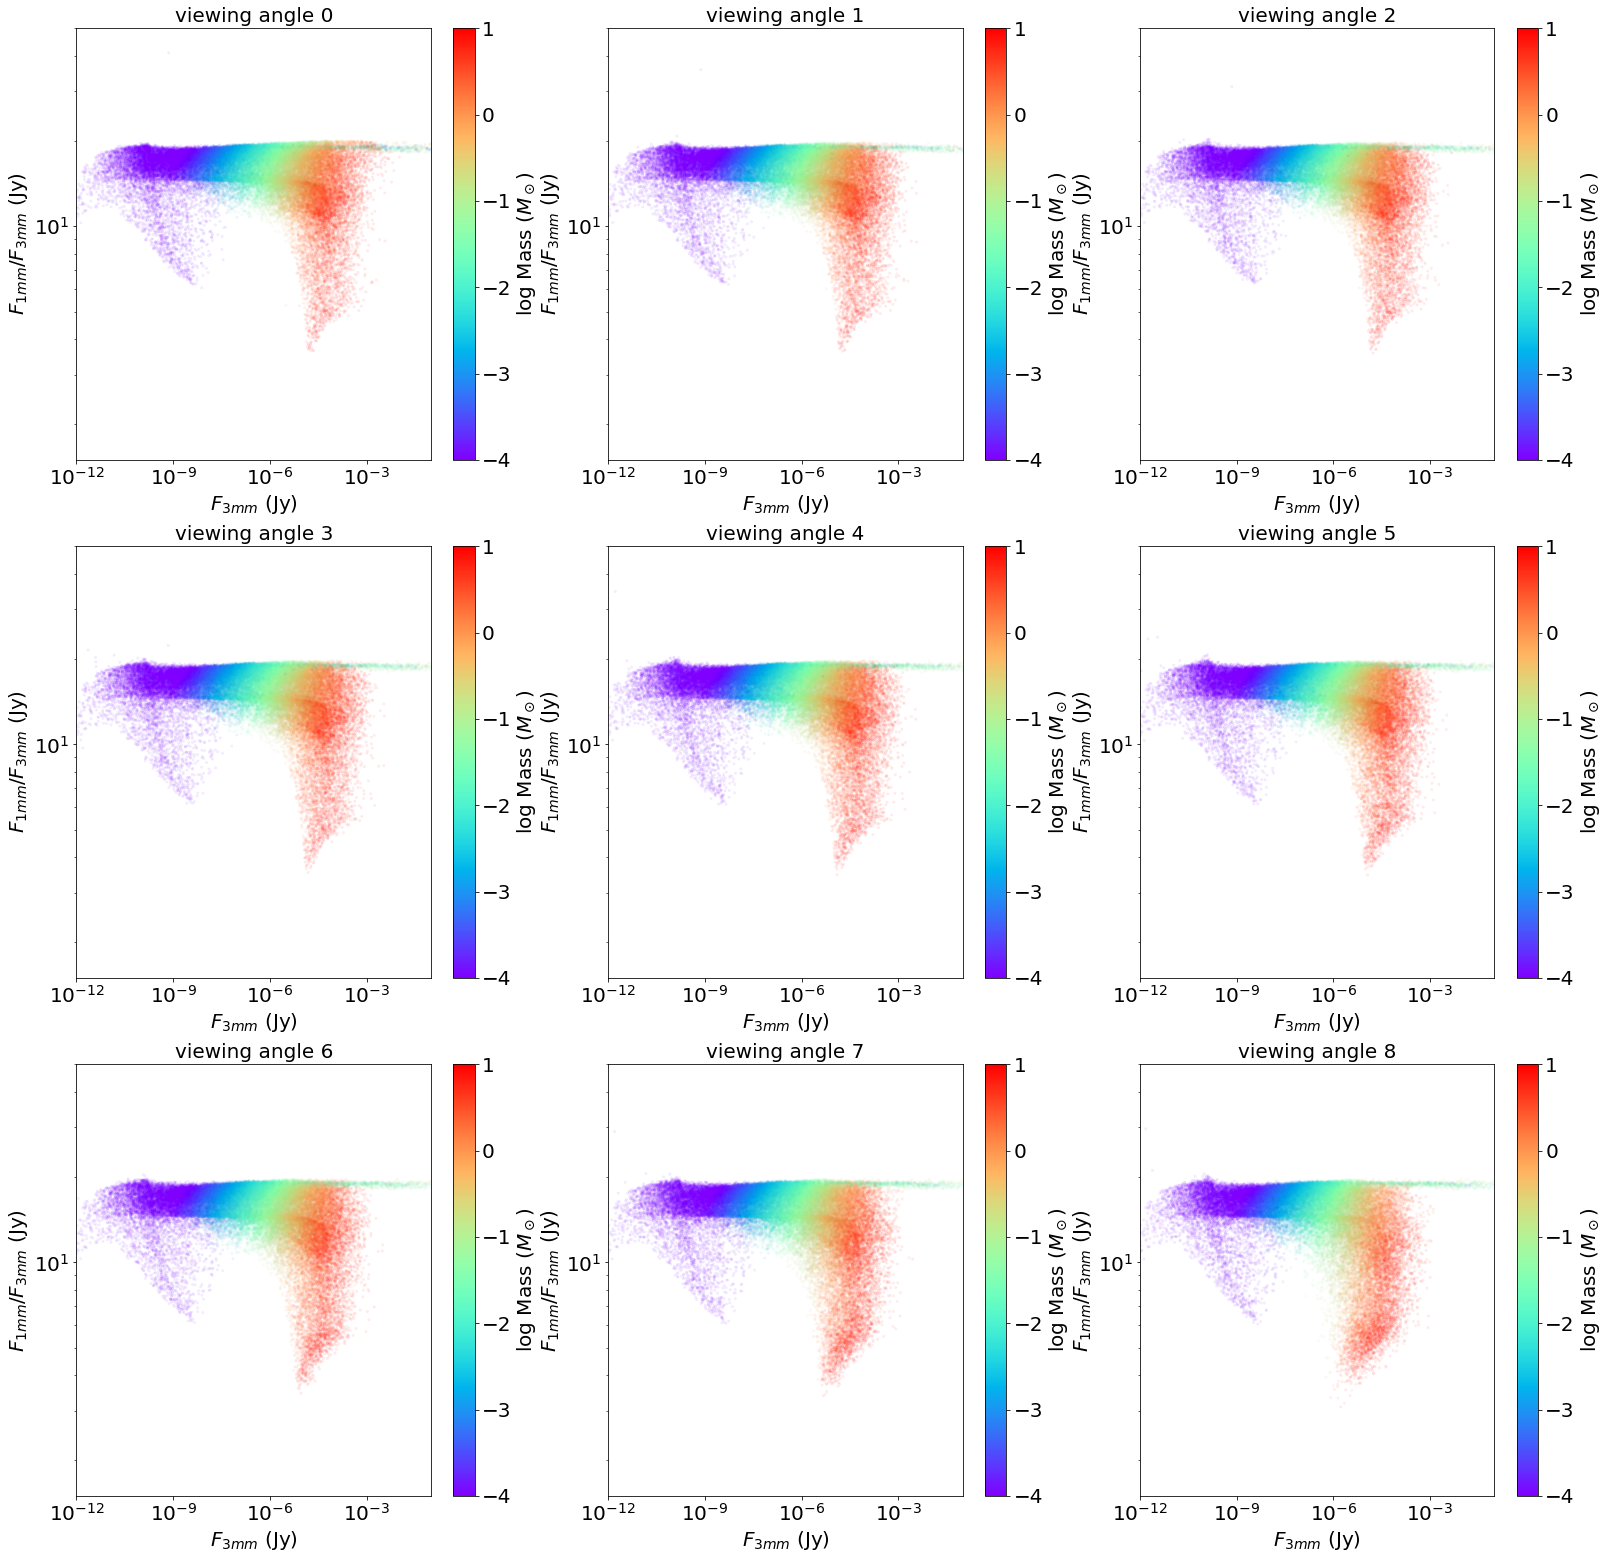

In [8]:
import glob
import os
b3freq = 92982346121.91989
b6freq = 226382496476.07114
    
apertures =np.logspace(2,6,20)
fig, axes = plt.subplots(3,3,figsize=(27,27))
pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')

cmap=plt.get_cmap('rainbow')

pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')

geometry = [os.path.basename(path).split('/')[-1][:7] for path in pathlist]

B3err = measure_rms

for path in geometry:
    filepath = seddir+path+'/flux_prop.fits'
    if not os.path.isfile(filepath):
        continue
    fluxfile = fits.open(filepath)
    cols = fluxfile[1].columns
    if not 'mass_los' in cols.names:
        continue
    print(path)
    
    for n in range(9):
        i = int(n/3)
        j = n%3
        
        modelname = fluxfile[1].data['model name']
        text = '_%02d'%(n+1)
      
        viewing_angle = [nn for nn, model in enumerate(modelname) if model[-3:]==text ]
        b6flux = fluxfile[1].data['b6 flux'][viewing_angle,3]*1e-3*(1/5.41)**2
        b3flux = fluxfile[1].data['b3 flux'][viewing_angle,3]*1e-3*(1/5.41)**2
        dusttemp = fluxfile[1].data['mass_los'][viewing_angle,3]
        notemp = dusttemp>-99
        dusttemp = dusttemp[notemp]
        logtemp = np.log10(dusttemp)

        b3flux = b3flux[notemp] ; b6flux = b6flux[notemp]
        
        ss = axes[i,j].scatter(b3flux, b6flux/b3flux,s=5,alpha=0.05, c=logtemp, cmap=cmap, vmin=-4, vmax=1)

        
for n in range(9):
    i = int(n/3)
    j = n%3



    axes[i,j].set_title('viewing angle %d'%n)

    axes[i,j].set_xscale('log')
    axes[i,j].set_yscale('log')
    axes[i,j].set_xlabel('$F_{3mm}$ (Jy)')
    axes[i,j].set_ylabel('$F_{1mm}/F_{3mm}$ (Jy)')
    axes[i,j].set_xlim(1e-12,1e-1)
    axes[i,j].set_ylim(1.5,50)
    color_bar = plt.colorbar(ss, ax=axes[i,j],alpha=1)


    color_bar.set_alpha(1)
    color_bar.draw_all()
    color_bar.set_label('log Mass ($M_\odot$)')


            #ss = axes[i,j].scatter(b3flux, b6flux/b3flux,s=5,alpha=0.05, c=np.repeat(logtemp,multiple), cmap=cmap, vmin=-2, vmax=1)


plt.savefig('mass_los_plot_viewing_angle.png')

s-pbsmi
s-p-hmi
spu-hmi
spubsmi
s-pbhmi
s-u-smi
s-ubhmi
spu-smi
s-u-hmi
s-ubsmi
spubhmi
s-p-smi


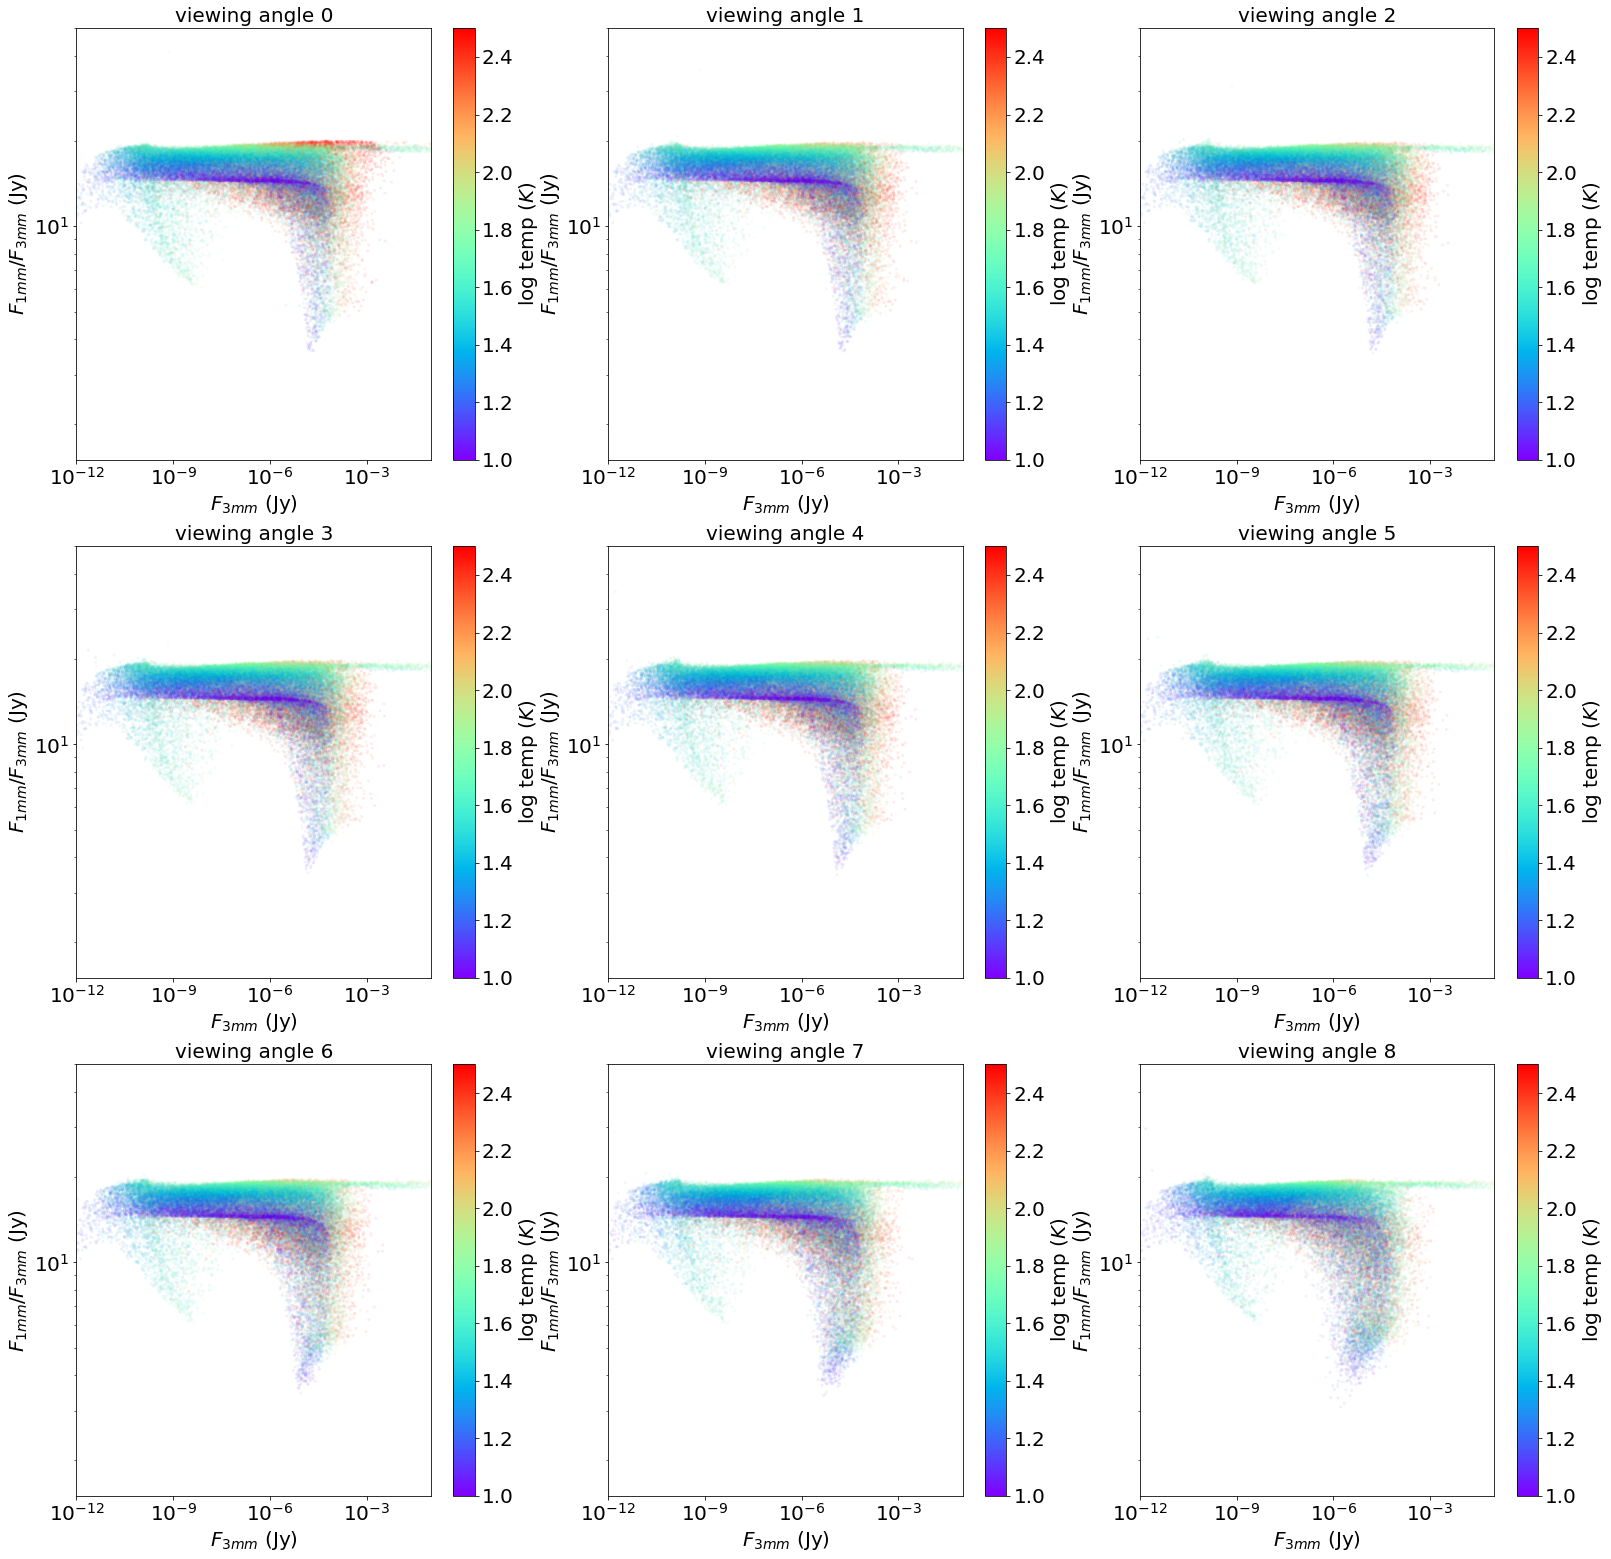

In [9]:
fig, axes = plt.subplots(3,3,figsize=(27,27))

for path in geometry:
    filepath = seddir+path+'/flux_prop.fits'
    if not os.path.isfile(filepath):
        continue
    fluxfile = fits.open(filepath)
    cols = fluxfile[1].columns
    if not 'temp_los' in cols.names:
        continue
    print(path)
    
    for n in range(9):
        i = int(n/3)
        j = n%3
        
        modelname = fluxfile[1].data['model name']
        text = '_%02d'%(n+1)
      
        viewing_angle = [nn for nn, model in enumerate(modelname) if model[-3:]==text ]
        b6flux = fluxfile[1].data['b6 flux'][viewing_angle,3]*1e-3*(1/5.41)**2
        b3flux = fluxfile[1].data['b3 flux'][viewing_angle,3]*1e-3*(1/5.41)**2
        dusttemp = fluxfile[1].data['temp_los'][viewing_angle,3]
        notemp = dusttemp>-99
        dusttemp = dusttemp[notemp]
        logtemp = np.log10(dusttemp)

        b3flux = b3flux[notemp] ; b6flux = b6flux[notemp]
        
        ss = axes[i,j].scatter(b3flux, b6flux/b3flux,s=5,alpha=0.05, c=logtemp, cmap=cmap, vmin=1, vmax=2.5)

        
for n in range(9):
    i = int(n/3)
    j = n%3



    axes[i,j].set_title('viewing angle %d'%n)

    axes[i,j].set_xscale('log')
    axes[i,j].set_yscale('log')
    axes[i,j].set_xlabel('$F_{3mm}$ (Jy)')
    axes[i,j].set_ylabel('$F_{1mm}/F_{3mm}$ (Jy)')
    axes[i,j].set_xlim(1e-12,1e-1)
    axes[i,j].set_ylim(1.5,50)
    color_bar = plt.colorbar(ss, ax=axes[i,j],alpha=1)


    color_bar.set_alpha(1)
    color_bar.draw_all()
    color_bar.set_label('log temp ($K$)')


            #ss = axes[i,j].scatter(b3flux, b6flux/b3flux,s=5,alpha=0.05, c=np.repeat(logtemp,multiple), cmap=cmap, vmin=-2, vmax=1)


plt.savefig('temp_los_plot_viewing_angle.png')

s-pbsmi
s-p-hmi
spu-hmi
spubsmi
s-pbhmi
s-u-smi
s-ubhmi
spu-smi
s-u-hmi
s-ubsmi
spubhmi
s-p-smi
[0.00048488 0.00098686 0.00145365 0.0483124  0.00239368 0.00135462
 0.00091929 0.00661993 0.00232734 0.01384447 0.00283793 0.00060363
 0.0009531  0.00060782 0.00181683 0.00349101 0.00082068 0.0023091
 0.00206721 0.00272642 0.00194957 0.00238623] [ 9.1664768   5.04051621  1.47529228  1.14027409  6.83795764  9.24907972
  6.56758659  5.12549541  7.07671493  5.08054275  5.48215768  6.60119986
 11.45188587  4.32827312  7.04450011  3.91855111  5.79377266  3.30589289
  4.91074534  4.57025613  5.77609769  3.76755138]
[0.00087038 0.00144222 0.00185878 0.07388732 0.0043826  0.00274406
 0.00194104 0.01388187 0.00457589 0.03023327 0.00532574 0.00134068
 0.00202293 0.00114474 0.00410866 0.00492402 0.00193174 0.00345785
 0.00325073 0.00544675 0.00362197 0.00422996] [ 8.03531631  4.26492067  0.70036164  0.95669764  7.00677666  9.5637463
  6.39394696  5.43247674  6.44972914  5.59127329  5.09017406  5.424656

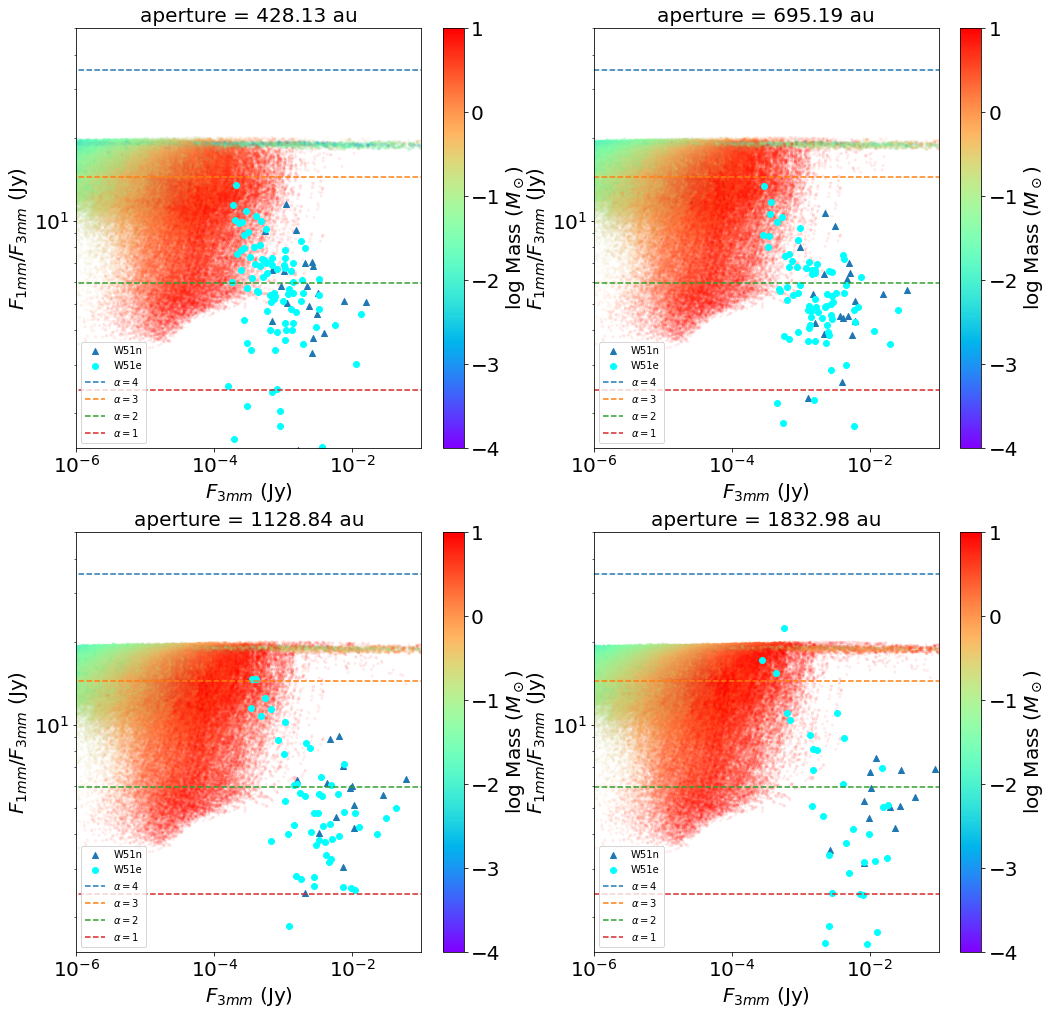

In [10]:
import glob
import os
b3freq = 92982346121.91989
b6freq = 226382496476.07114
    
apertures =np.logspace(2,6,20)
fig,axes = plt.subplots(2,2,figsize=(17,17))
pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')

cmap=plt.get_cmap('rainbow')

pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')

geometry = [os.path.basename(path).split('/')[-1][:7] for path in pathlist]

B3err = measure_rms

for path in geometry:
    filepath = seddir+path+'/flux_prop.fits'
    if not os.path.isfile(filepath):
        continue
    fluxfile = fits.open(filepath)
    cols = fluxfile[1].columns
    if not 'mass_los' in cols.names:
        continue
    print(path)
    for i in range(2):
        for j in range(2):
            ind = i*2+j

            b6flux = fluxfile[1].data['b6 flux'][:,ind+3]*1e-3*(1/5.41)**2
            b3flux = fluxfile[1].data['b3 flux'][:,ind+3]*1e-3*(1/5.41)**2
            
            dusttemp = fluxfile[1].data['mass_los'][:,ind+3]
            notemp = dusttemp>-99
            dusttemp = dusttemp[notemp]
            logtemp = np.log10(dusttemp)
            
            b3flux = b3flux[notemp] ; b6flux = b6flux[notemp]
            ss = axes[i,j].scatter(b3flux, b6flux/b3flux,s=5,alpha=0.05, c=logtemp, cmap=cmap, vmin=-4, vmax=1)

           
            

            #ss = axes[i,j].scatter(b3flux, b6flux/b3flux,s=5,alpha=0.05, c=np.repeat(logtemp,multiple), cmap=cmap, vmin=-2, vmax=1)


for i in range(2):
    for j in range(2):    
        ind = i*2+j
        axes[i,j].scatter(w51n_b3_flux[:,ind]*(5.41/5.1)**2, w51n_b6_flux[:,ind]/w51n_b3_flux[:,ind], marker='^',label='W51n')
    
        axes[i,j].scatter(w51e_b3_flux[:,ind], w51e_b6_flux[:,ind]/w51e_b3_flux[:,ind], marker='o',label='W51e',c='cyan')
        print(w51n_b3_flux[:,ind], w51n_b6_flux[:,ind]/w51n_b3_flux[:,ind])
        xx = np.logspace(-9,4,100)

        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**4, label=r'$\alpha=4$', ls='dashed')
        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**3, label=r'$\alpha=3$', ls='dashed')
        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**2, label=r'$\alpha=2$', ls='dashed')
        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq), label=r'$\alpha=1$', ls='dashed')
        axes[i,j].legend(loc='lower left')
        #axes[i,j].set_xlim(1e-9,1e4)
        #axes[i,j].set_ylim(3,30)
        #axes[i,j].set_xscale('log')
        #axes[i,j].set_yscale('log')
        axes[i,j].set_title('aperture = %3.2f au'%apertures[ind+3])
        
        axes[i,j].set_xscale('log')
        axes[i,j].set_yscale('log')
        axes[i,j].set_xlabel('$F_{3mm}$ (Jy)')
        axes[i,j].set_ylabel('$F_{1mm}/F_{3mm}$ (Jy)')
        axes[i,j].set_xlim(1e-6,1e-1)
        axes[i,j].set_ylim(1.5,50)
        color_bar = plt.colorbar(ss, ax=axes[i,j],alpha=1)


        color_bar.set_alpha(1)
        color_bar.draw_all()
        color_bar.set_label('log Mass ($M_\odot$)')
plt.savefig('mass_los_plot_obs.png')

0 0 0
1 0 1
2 0 2
3 0 3
4 1 0
5 1 1
6 1 2
7 1 3
8 2 0
9 2 1
10 2 2
11 2 3


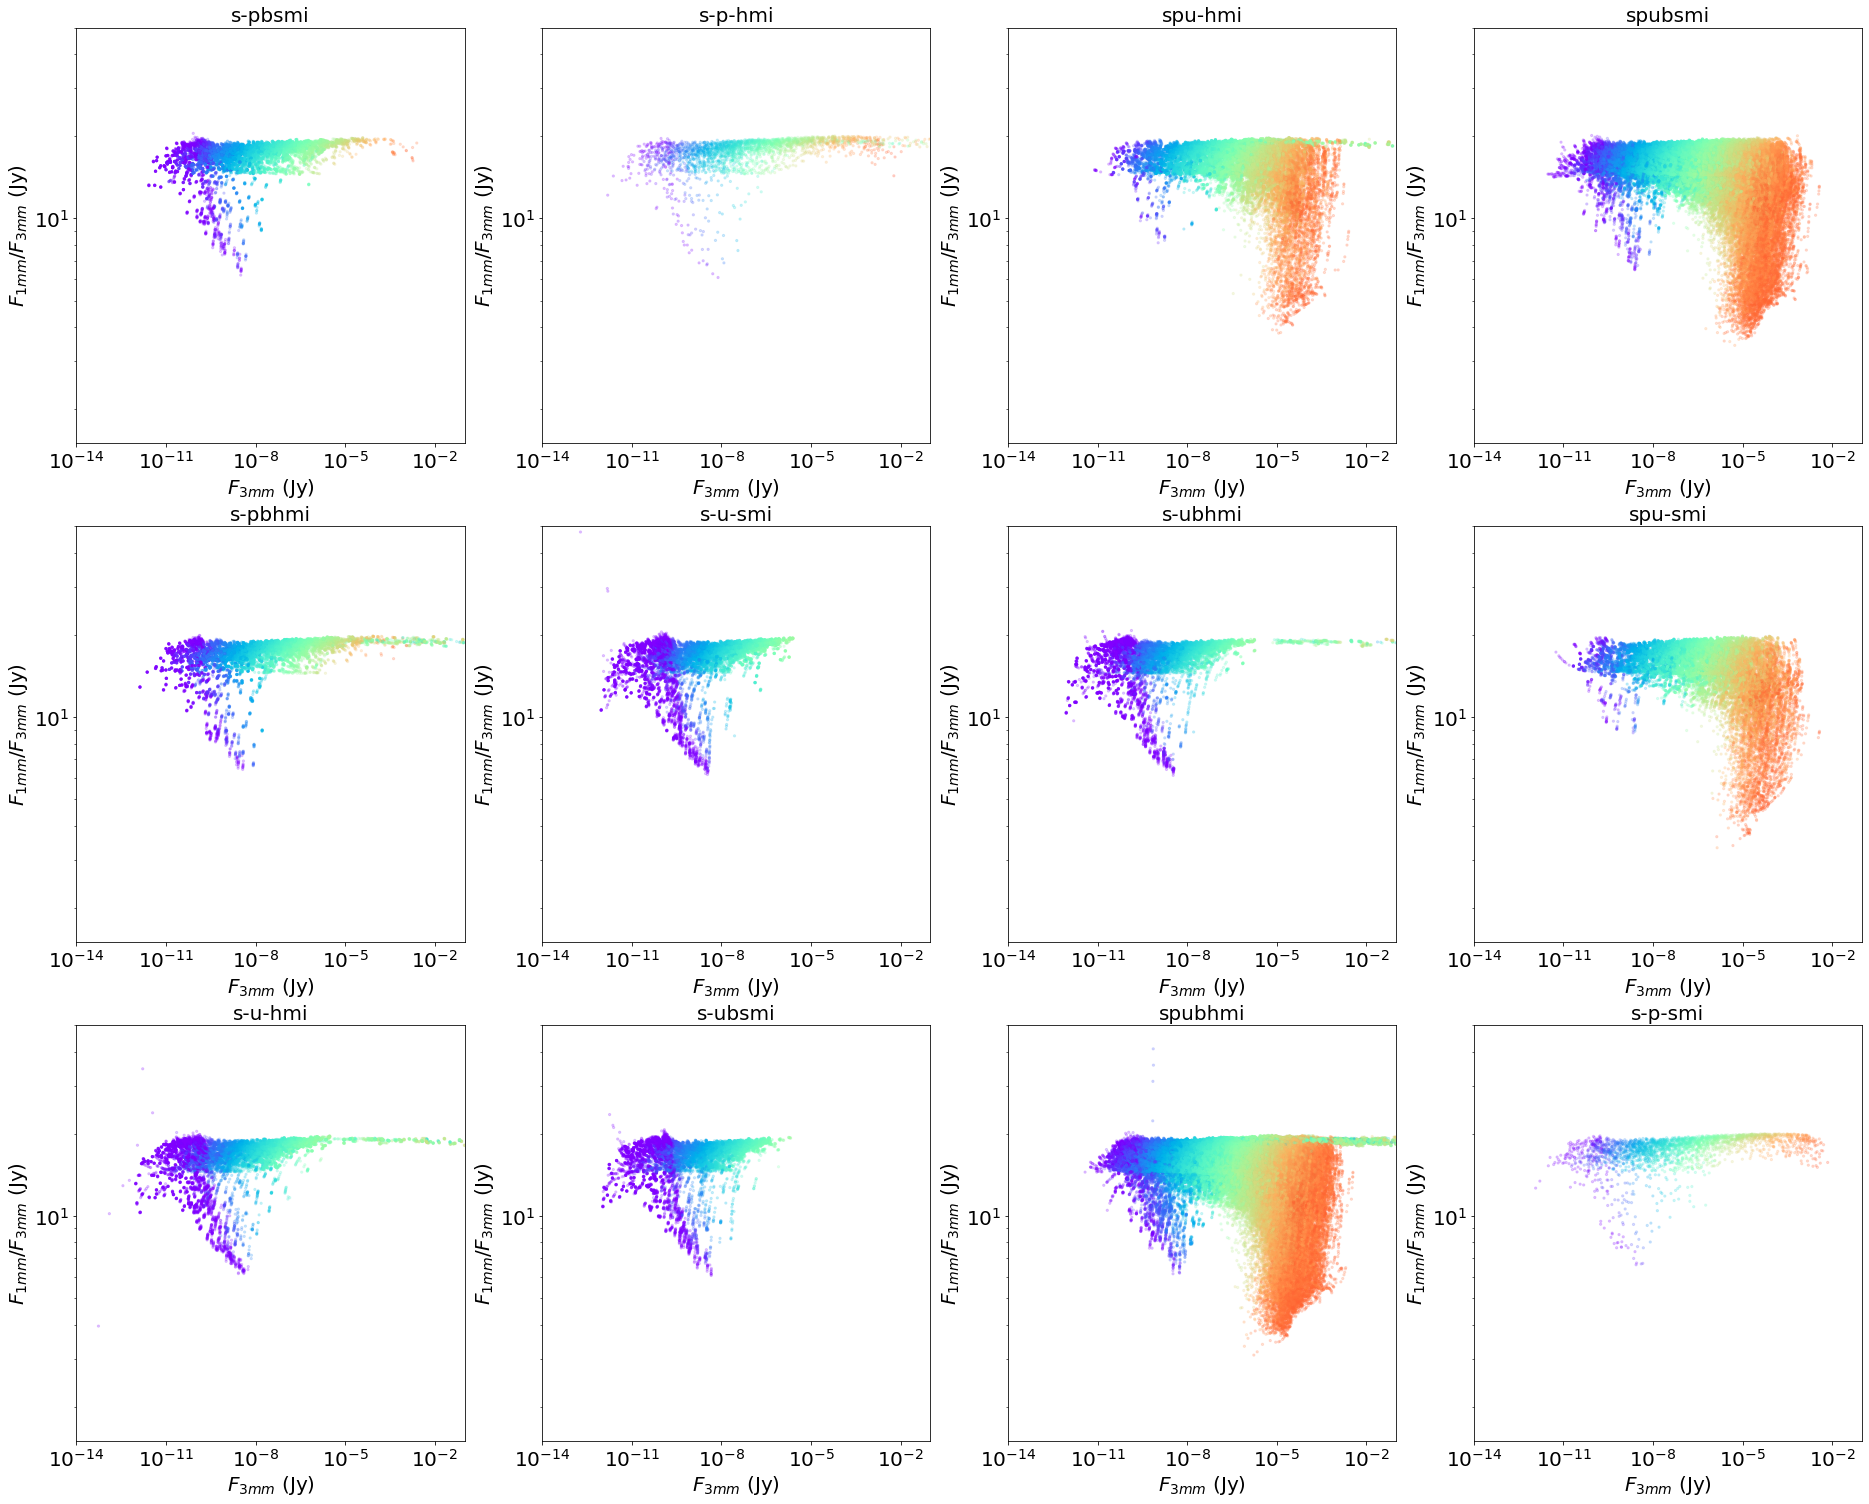

In [11]:

import glob
import os
b3freq = 92982346121.91989
b6freq = 226382496476.07114
    
apertures =np.logspace(2,6,20)
fig,axes = plt.subplots(3,4,figsize=(32,26))
pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')

cmap=plt.get_cmap('rainbow')

pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')

geometry = [os.path.basename(path).split('/')[-1][:7] for path in pathlist]

B3err = measure_rms
n=0
for path in geometry:
    filepath = seddir+path+'/flux_prop.fits'
    if not os.path.isfile(filepath):
        continue
    fluxfile = fits.open(filepath)
    cols = fluxfile[1].columns
    if not 'mass_los' in cols.names:
        continue
    i = int(n/4)
    j = n%4
    print(n,i,j)
    
    b6flux = fluxfile[1].data['B6 flux'][:,3]*1e-3*(1/5.41)**2
    b3flux = fluxfile[1].data['B3 flux'][:,3]*1e-3*(1/5.41)**2

    dusttemp = fluxfile[1].data['mass_los'][:,3]
    notemp = dusttemp>-99
    dusttemp = dusttemp[notemp]
    logtemp = np.log10(dusttemp)

    b3flux = b3flux[notemp] ; b6flux = b6flux[notemp]
    ss = axes[i,j].scatter(b3flux, b6flux/b3flux,s=5,alpha=0.2, c=logtemp, cmap=cmap, vmin=-6, vmax=2)

           
    
    #axes[i,j].scatter(w51n_b3_flux[:,3]*(5.41/5.1)**2, w51n_b6_flux[:,3]/w51n_b3_flux[:,3], marker='^',label='W51n')

    #axes[i,j].scatter(w51e_b3_flux[:,3], w51e_b6_flux[:,3]/w51e_b3_flux[:,3], marker='o',label='W51e',c='cyan')
    xx = np.logspace(-9,4,100)

    #axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**4, label=r'$\alpha=4$', ls='dashed')
    #axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**3, label=r'$\alpha=3$', ls='dashed')
    ##axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**2, label=r'$\alpha=2$', ls='dashed')
    #axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq), label=r'$\alpha=1$', ls='dashed')
    #axes[i,j].legend(loc='lower left')
    #axes[i,j].set_xlim(1e-9,1e4)
    #axes[i,j].set_ylim(3,30)
    #axes[i,j].set_xscale('log')
    #axes[i,j].set_yscale('log')
    axes[i,j].set_title('%s'%path)

    axes[i,j].set_xscale('log')
    axes[i,j].set_yscale('log')
    axes[i,j].set_xlabel('$F_{3mm}$ (Jy)')
    axes[i,j].set_ylabel('$F_{1mm}/F_{3mm}$ (Jy)')
    axes[i,j].set_xlim(1e-14,1e-1)
    axes[i,j].set_ylim(1.5,50)
    #color_bar = plt.colorbar(ss, ax=axes[i,j],alpha=1)

    n=n+1

    #color_bar.set_alpha(1)
    #color_bar.draw_all()
    #color_bar.set_label('log Mass ($M_\odot$)')
plt.savefig('mass_los_plot_geo.png')







0 0 0
1 0 1
2 0 2
3 0 3
4 1 0
5 1 1
6 1 2
7 1 3
8 2 0
9 2 1
10 2 2
11 2 3


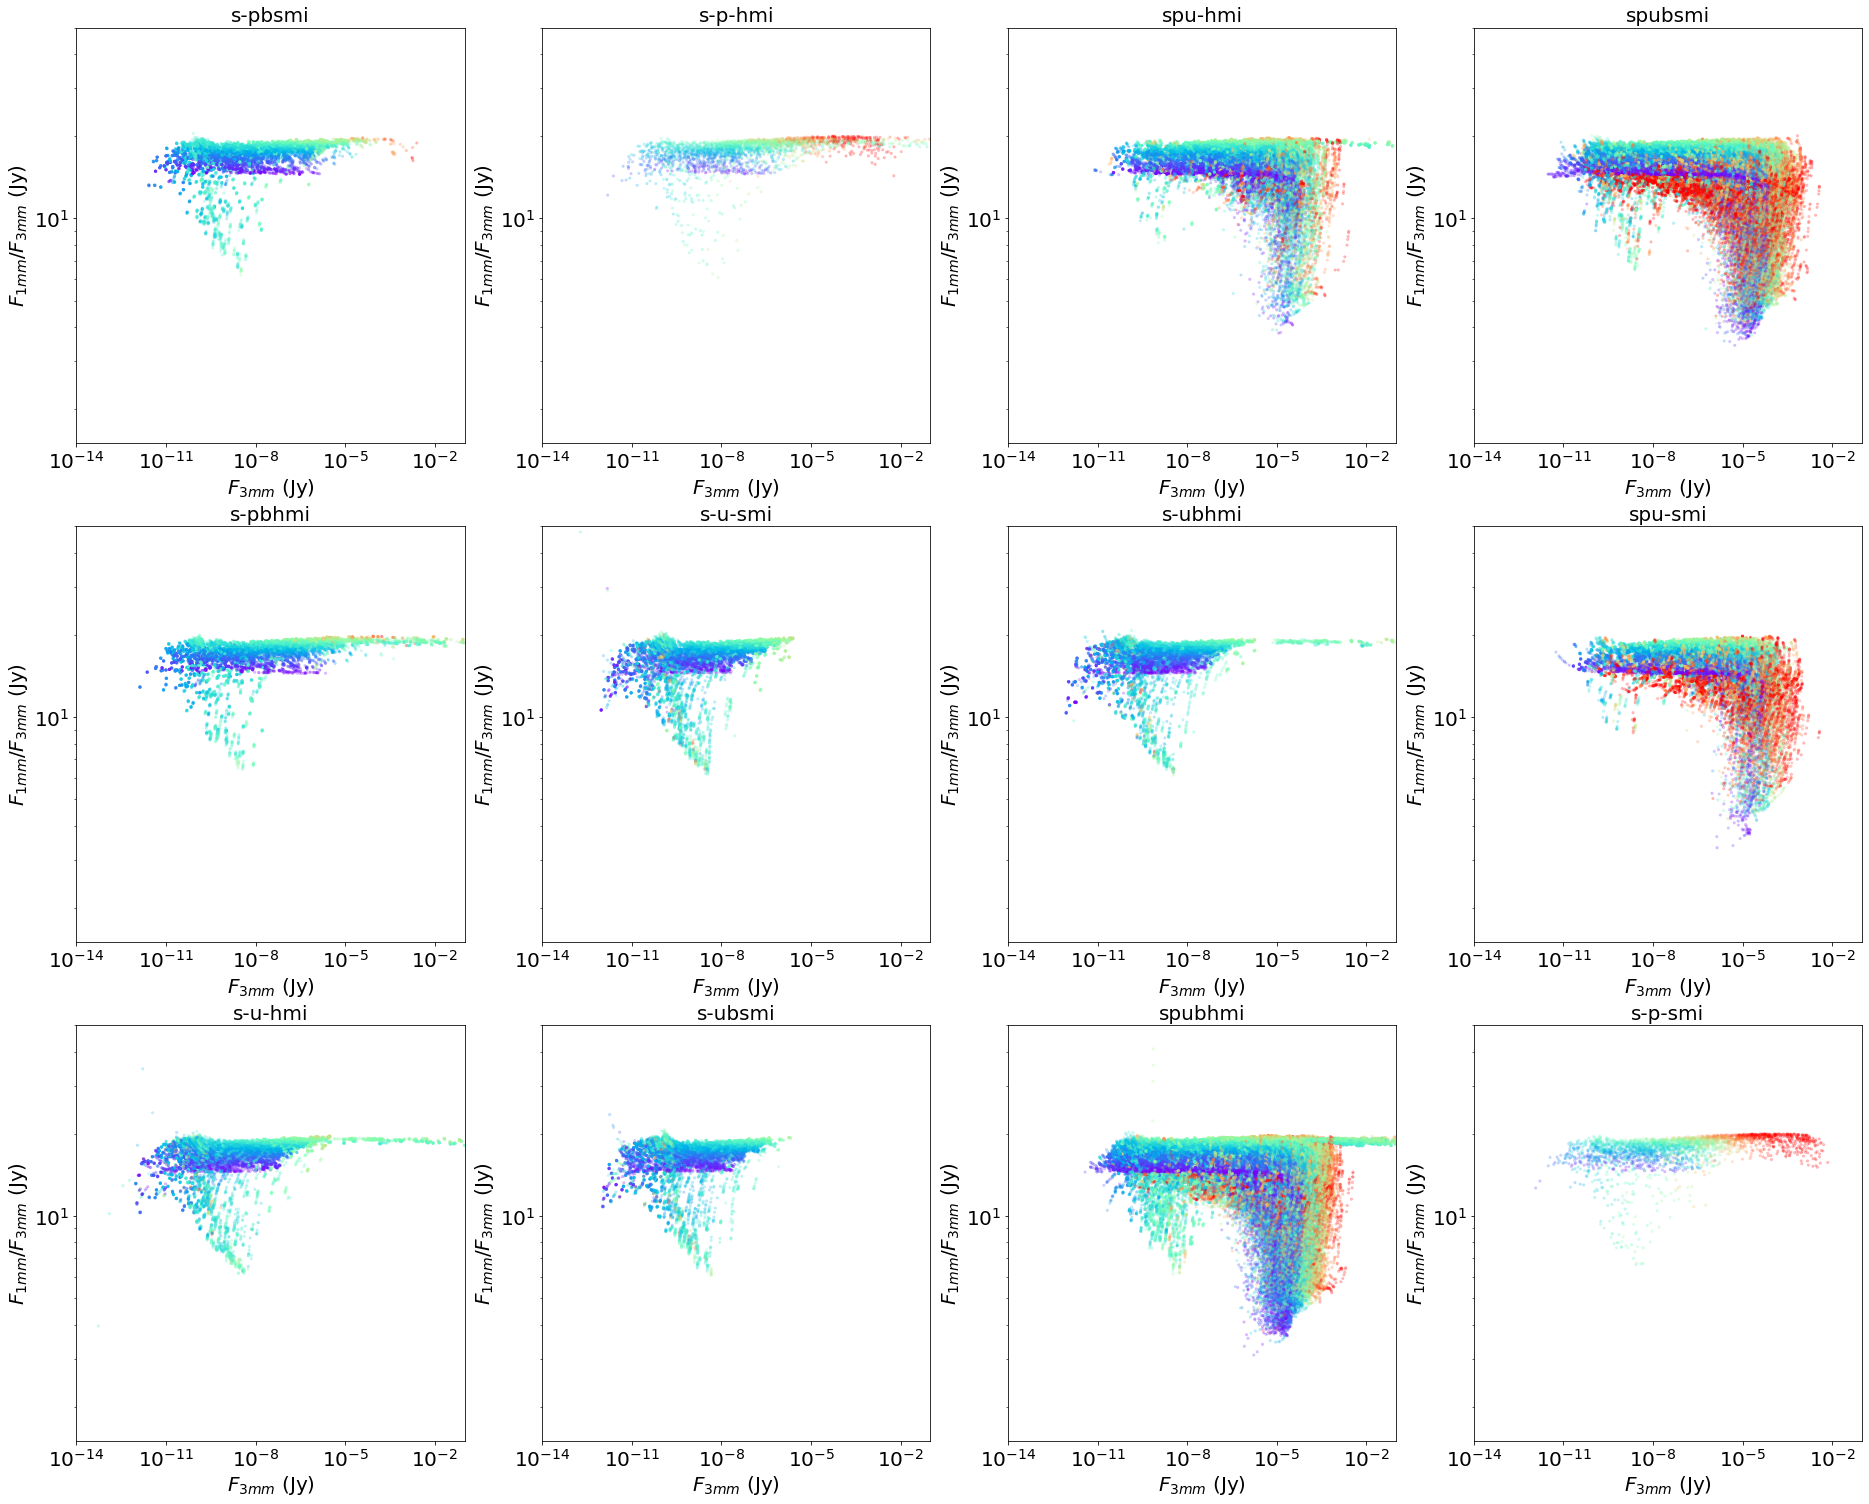

In [12]:

import glob
import os
b3freq = 92982346121.91989
b6freq = 226382496476.07114
    
apertures =np.logspace(2,6,20)
fig,axes = plt.subplots(3,4,figsize=(32,26))
pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')

cmap=plt.get_cmap('rainbow')

pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')

geometry = [os.path.basename(path).split('/')[-1][:7] for path in pathlist]

B3err = measure_rms
n=0
for path in geometry:
    filepath = seddir+path+'/flux_prop.fits'
    if not os.path.isfile(filepath):
        continue
    fluxfile = fits.open(filepath)
    cols = fluxfile[1].columns
    if not 'mass_los' in cols.names:
        continue
    i = int(n/4)
    j = n%4
    print(n,i,j)
    
    b6flux = fluxfile[1].data['B6 flux'][:,3]*1e-3*(1/5.41)**2
    b3flux = fluxfile[1].data['B3 flux'][:,3]*1e-3*(1/5.41)**2

    dusttemp = fluxfile[1].data['temp_los'][:,3]
    notemp = dusttemp>-99
    dusttemp = dusttemp[notemp]
    logtemp = np.log10(dusttemp)

    b3flux = b3flux[notemp] ; b6flux = b6flux[notemp]
    ss = axes[i,j].scatter(b3flux, b6flux/b3flux,s=5,alpha=0.2, c=logtemp, cmap=cmap, vmin=1, vmax=2.5)

           
    
    #axes[i,j].scatter(w51n_b3_flux[:,3]*(5.41/5.1)**2, w51n_b6_flux[:,3]/w51n_b3_flux[:,3], marker='^',label='W51n')

    #axes[i,j].scatter(w51e_b3_flux[:,3], w51e_b6_flux[:,3]/w51e_b3_flux[:,3], marker='o',label='W51e',c='cyan')
    xx = np.logspace(-9,4,100)

    #axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**4, label=r'$\alpha=4$', ls='dashed')
    #axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**3, label=r'$\alpha=3$', ls='dashed')
    ##axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**2, label=r'$\alpha=2$', ls='dashed')
    #axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq), label=r'$\alpha=1$', ls='dashed')
    #axes[i,j].legend(loc='lower left')
    #axes[i,j].set_xlim(1e-9,1e4)
    #axes[i,j].set_ylim(3,30)
    #axes[i,j].set_xscale('log')
    #axes[i,j].set_yscale('log')
    axes[i,j].set_title('%s'%path)

    axes[i,j].set_xscale('log')
    axes[i,j].set_yscale('log')
    axes[i,j].set_xlabel('$F_{3mm}$ (Jy)')
    axes[i,j].set_ylabel('$F_{1mm}/F_{3mm}$ (Jy)')
    axes[i,j].set_xlim(1e-14,1e-1)
    axes[i,j].set_ylim(1.5,50)
    #color_bar = plt.colorbar(ss, ax=axes[i,j],alpha=1)

    n=n+1

    #color_bar.set_alpha(1)
    #color_bar.draw_all()
    #color_bar.set_label('log Mass ($M_\odot$)')
plt.savefig('temp_los_plot_geo.png')







0 0 0
1 0 1
2 0 2
3 0 3
4 1 0
5 1 1
6 1 2
7 1 3
8 2 0
9 2 1
10 2 2
11 2 3


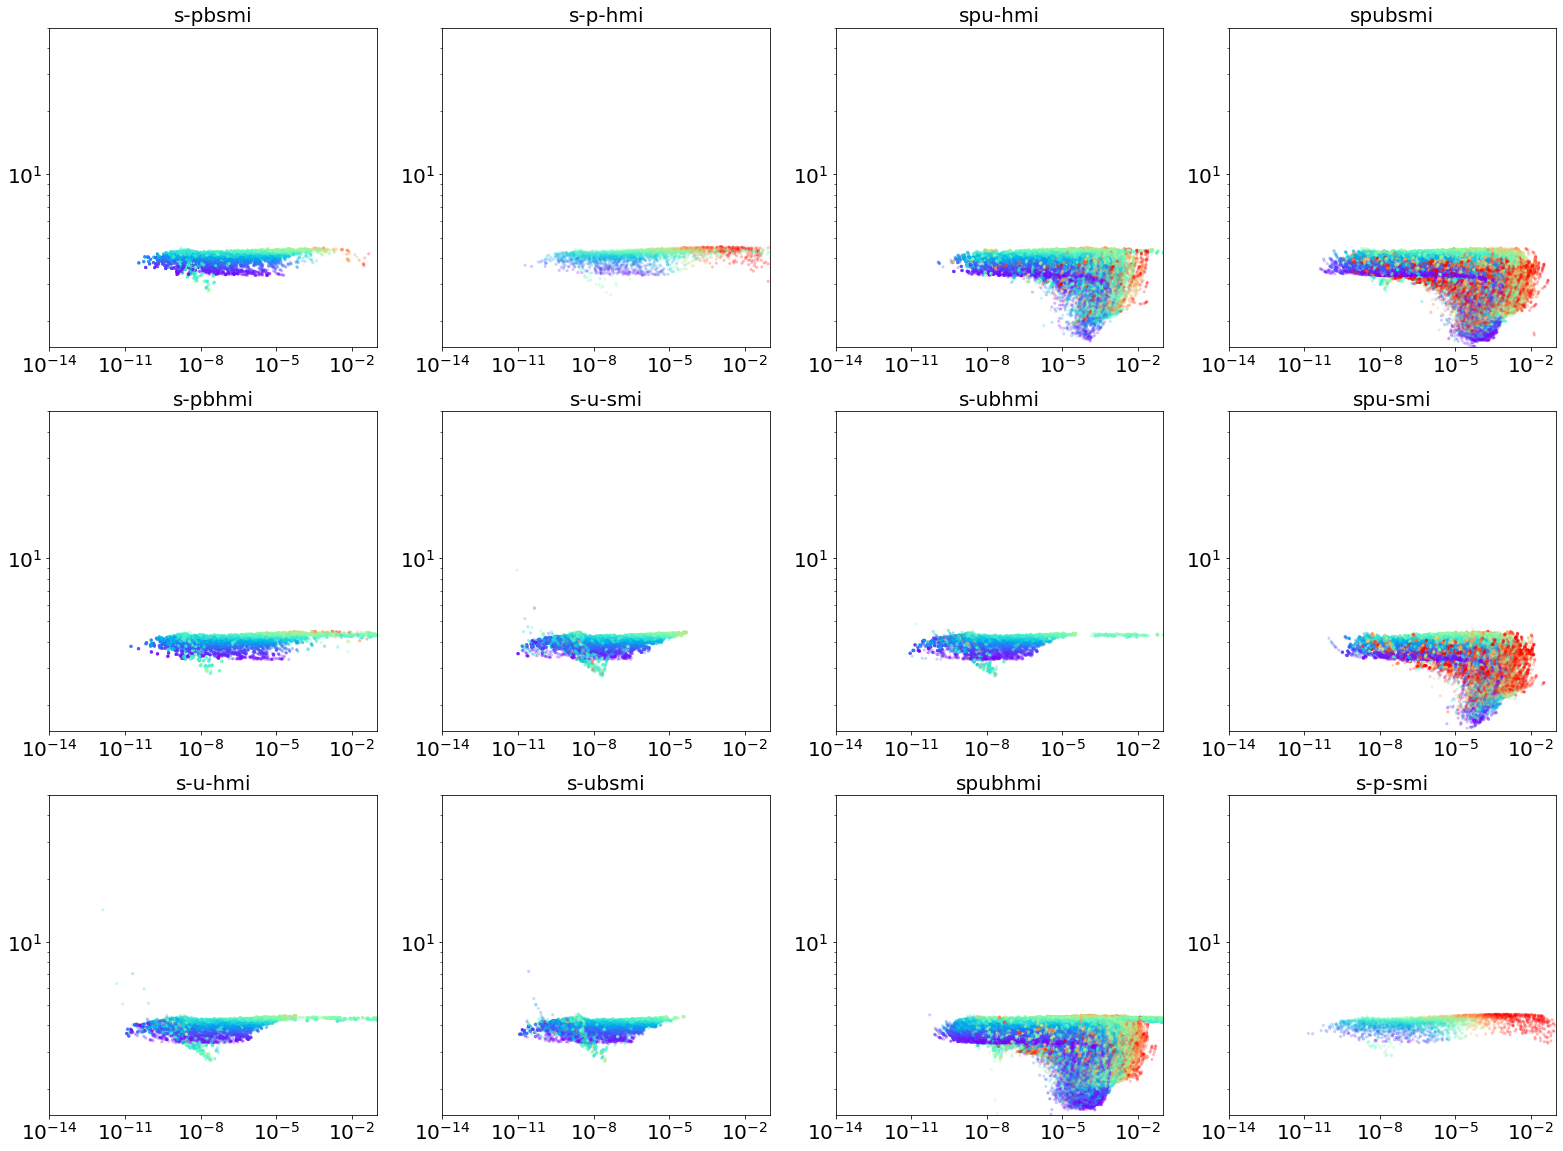

In [13]:

import glob
import os
b3freq = 92982346121.91989
b6freq = 226382496476.07114
    
apertures =np.logspace(2,6,20)
fig,axes = plt.subplots(3,4,figsize=(27,20))
pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')

cmap=plt.get_cmap('rainbow')

pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')

geometry = [os.path.basename(path).split('/')[-1][:7] for path in pathlist]

B3err = measure_rms
n=0
for path in geometry:
    filepath = seddir+path+'/flux_prop.fits'
    if not os.path.isfile(filepath):
        continue
    fluxfile = fits.open(filepath)
    cols = fluxfile[1].columns
    if not 'mass_los' in cols.names:
        continue
    i = int(n/4)
    j = n%4
    print(n,i,j)
    
    b6flux = fluxfile[1].data['B7 flux'][:,3]*1e-3*(1/5.41)**2
    b3flux = fluxfile[1].data['B6 flux'][:,3]*1e-3*(1/5.41)**2

    dusttemp = fluxfile[1].data['temp_los'][:,3]
    notemp = dusttemp>-99
    dusttemp = dusttemp[notemp]
    logtemp = np.log10(dusttemp)

    b3flux = b3flux[notemp] ; b6flux = b6flux[notemp]
    ss = axes[i,j].scatter(b3flux, b6flux/b3flux,s=5,alpha=0.2, c=logtemp, cmap=cmap, vmin=1, vmax=2.5)

           
    
    #axes[i,j].scatter(w51n_b3_flux[:,3]*(5.41/5.1)**2, w51n_b6_flux[:,3]/w51n_b3_flux[:,3], marker='^',label='W51n')

    #axes[i,j].scatter(w51e_b3_flux[:,3], w51e_b6_flux[:,3]/w51e_b3_flux[:,3], marker='o',label='W51e',c='cyan')
    xx = np.logspace(-9,4,100)

    #axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**4, label=r'$\alpha=4$', ls='dashed')
    #axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**3, label=r'$\alpha=3$', ls='dashed')
    ##axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**2, label=r'$\alpha=2$', ls='dashed')
    #axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq), label=r'$\alpha=1$', ls='dashed')
    #axes[i,j].legend(loc='lower left')
    #axes[i,j].set_xlim(1e-9,1e4)
    #axes[i,j].set_ylim(3,30)
    #axes[i,j].set_xscale('log')
    #axes[i,j].set_yscale('log')
    axes[i,j].set_title('%s'%path)

    axes[i,j].set_xscale('log')
    axes[i,j].set_yscale('log')
    #axes[i,j].set_xlabel('$F_{3mm}$ (Jy)')
    #axes[i,j].set_ylabel('$F_{1mm}/F_{3mm}$ (Jy)')
    axes[i,j].set_xlim(1e-14,1e-1)
    axes[i,j].set_ylim(1.5,50)
    #color_bar = plt.colorbar(ss, ax=axes[i,j],alpha=1)

    n=n+1

    #color_bar.set_alpha(1)
    #color_bar.draw_all()
    #color_bar.set_label('log Mass ($M_\odot$)')
plt.savefig('mass_los_plot_obs_geo.png')







[0.00048488 0.00098686 0.00145365 0.0483124  0.00239368 0.00135462
 0.00091929 0.00661993 0.00232734 0.01384447 0.00283793 0.00060363
 0.0009531  0.00060782 0.00181683 0.00349101 0.00082068 0.0023091
 0.00206721 0.00272642 0.00194957 0.00238623] [ 9.1664768   5.04051621  1.47529228  1.14027409  6.83795764  9.24907972
  6.56758659  5.12549541  7.07671493  5.08054275  5.48215768  6.60119986
 11.45188587  4.32827312  7.04450011  3.91855111  5.79377266  3.30589289
  4.91074534  4.57025613  5.77609769  3.76755138]
[0.00087038 0.00144222 0.00185878 0.07388732 0.0043826  0.00274406
 0.00194104 0.01388187 0.00457589 0.03023327 0.00532574 0.00134068
 0.00202293 0.00114474 0.00410866 0.00492402 0.00193174 0.00345785
 0.00325073 0.00544675 0.00362197 0.00422996] [ 8.03531631  4.26492067  0.70036164  0.95669764  7.00677666  9.5637463
  6.39394696  5.43247674  6.44972914  5.59127329  5.09017406  5.42465673
 10.66295659  2.27463193  6.12661949  3.83313376  3.87683894  2.59373029
  4.49648182  4.3075

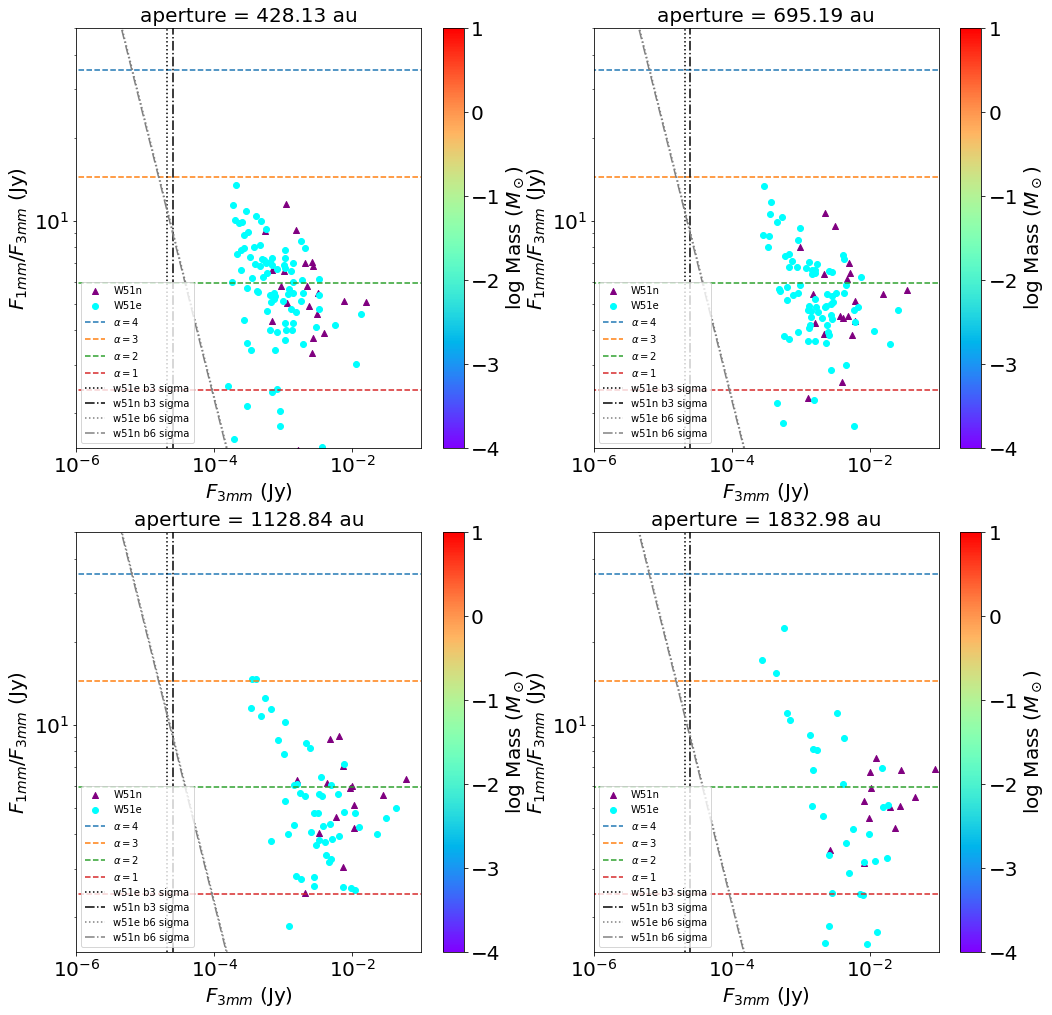

In [14]:
import glob
import os
b3freq = 92982346121.91989
b6freq = 226382496476.07114
    
apertures =np.logspace(2,6,20)
fig,axes = plt.subplots(2,2,figsize=(17,17))
pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')

cmap=plt.get_cmap('rainbow')

pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')

geometry = [os.path.basename(path).split('/')[-1][:7] for path in pathlist]

B3err = measure_rms

for path in geometry:
    filepath = seddir+path+'/flux_prop.fits'
    if not os.path.isfile(filepath):
        continue
    fluxfile = fits.open(filepath)
    cols = fluxfile[1].columns
    if not 'mass' in cols.names:
        continue
    for i in range(2):
        for j in range(2):
            ind = i*2+j

            b6flux = fluxfile[1].data['B6 flux'][:,ind+3]*1e-3*(1/5.41)**2
            b3flux = fluxfile[1].data['B3 flux'][:,ind+3]*1e-3*(1/5.41)**2
            
            dusttemp = fluxfile[1].data['mass'][:,ind+3]
            notemp = dusttemp>-99
            dusttemp = dusttemp[notemp]
            logtemp = np.log10(dusttemp)
            
            b3flux = b3flux[notemp] ; b6flux = b6flux[notemp]
            ss = axes[i,j].scatter(b3flux, b6flux/b3flux,s=5,alpha=0.05, c=logtemp, cmap=cmap, vmin=-4, vmax=1)

           
            

            #ss = axes[i,j].scatter(b3flux, b6flux/b3flux,s=5,alpha=0.05, c=np.repeat(logtemp,multiple), cmap=cmap, vmin=-2, vmax=1)


for i in range(2):
    for j in range(2):    
        ind = i*2+j
        axes[i,j].scatter(w51n_b3_flux[:,ind]*(5.41/5.1)**2, w51n_b6_flux[:,ind]/w51n_b3_flux[:,ind], marker='^',label='W51n',c='purple')
    
        axes[i,j].scatter(w51e_b3_flux[:,ind], w51e_b6_flux[:,ind]/w51e_b3_flux[:,ind], marker='o',label='W51e',c='cyan')
        print(w51n_b3_flux[:,ind], w51n_b6_flux[:,ind]/w51n_b3_flux[:,ind])
        xx = np.logspace(-14,2,100)

        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**4, label=r'$\alpha=4$', ls='dashed')
        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**3, label=r'$\alpha=3$', ls='dashed')
        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**2, label=r'$\alpha=2$', ls='dashed')
        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq), label=r'$\alpha=1$', ls='dashed')
        axes[i,j].vlines(2.065537678896079e-05, 1.5,50,color='k', ls='dotted', label='w51e b3 sigma')
        axes[i,j].vlines(2.220660593897177e-05*(5.41/5.1)**2,1.5,50, color='k', ls='-.', label='w51n b3 sigma')
        
        axes[i,j].plot(xx, 0.00022818539454139218/xx, c='gray', ls='dotted', label='w51e b6 sigma')
        axes[i,j].plot(xx, 0.00022277532231775282/xx, c='gray', ls='-.', label='w51n b6 sigma')

        axes[i,j].legend(loc='lower left')
        #axes[i,j].set_xlim(1e-9,1e4)
        #axes[i,j].set_ylim(3,30)
        #axes[i,j].set_xscale('log')
        #axes[i,j].set_yscale('log')
        axes[i,j].set_title('aperture = %3.2f au'%apertures[ind+3])
        
        axes[i,j].set_xscale('log')
        axes[i,j].set_yscale('log')
        axes[i,j].set_xlabel('$F_{3mm}$ (Jy)')
        axes[i,j].set_ylabel('$F_{1mm}/F_{3mm}$ (Jy)')
        axes[i,j].set_xlim(1e-6,1e-1)
        axes[i,j].set_ylim(1.5,50)
        color_bar = plt.colorbar(ss, ax=axes[i,j],alpha=1)


        color_bar.set_alpha(1)
        color_bar.draw_all()
        color_bar.set_label('log Mass ($M_\odot$)')
plt.savefig('mass_plot_obs.png')